<div class="alert alert-info" style="background-color: #e6f7ff; border-radius: 10px; padding: 15px; border-left: 4px solid #9fd3f7; box-shadow: 2px 2px 2px #b8daff;">

# Video Game Success Analysis

## Introduction

In an industry as dynamic as video gaming, understanding the factors that lead to a game's success is crucial for developers and marketers alike. This project aims to uncover patterns in game sales and reviews, providing insight that can shape future advertising campaigns and development strategies.

As an analyst for Ice, an online video game store, the task is to mine data from game sales, user and expert reviews, genres, and platforms, such as Xbox and PlayStation. With this information, we will identify the traits of games that tend to succeed, aiding in the prediction of future trends and the identification of potential hits for the upcoming year.

## Project Goals

- **Data Examination**: Assess the comprehensive dataset for quality and structure.
- **Data Cleaning**: Standardize column names, handle missing values, and correct data types to ensure accuracy in analysis.
- **Sales Analysis**: Calculate total sales for each game and analyze yearly distribution and platform performance.
- **Trend Analysis**: Identify leading platforms and genres, and analyze the impact of user and critic reviews on sales.
- **Regional Profiles**: Develop profiles for different regions to understand market differences and preferences.

## Significance of ESRB Ratings

Understanding the Entertainment Software Rating Board (ESRB) ratings will also be a focal point, as these ratings may influence a game's reception in various regions.

## Analytical Approach

- **Historical Data Analysis**: Study game releases and sales trends up to 2016 to inform the 2017 campaign strategy.
- **Hypothesis Testing**: Compare user ratings across platforms and genres to deduce preferences and popularity.

## Conclusion Goals

By the end of this analysis, we aim to provide Ice with actionable insights on which gaming platforms to prioritize, which genres to focus on, and how ESRB ratings affect regional sales. This will guide the planning of effective advertising campaigns for 2017.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data = data.rename(str.lower, axis='columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very elegant.
</div>

In [5]:
total_rows = len(data['user_score'])
tbd_count = len(data[data['user_score'] == 'tbd'])
tbd_percentage = (tbd_count / total_rows) * 100
tbd_percentage = round(tbd_percentage, 2)
tbd_percentage

14.5

In [6]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
tbd_platform_counts = data.loc[data['user_score'] == 'tbd', 'platform'].value_counts()
tbd_platform_counts

DS      756
Wii     440
GBA     262
PS2     240
XB      150
PSP     123
GC      103
PS3      87
X360     84
3DS      56
PC       49
PS       45
XOne     11
PSV       7
PS4       6
WiiU      5
Name: platform, dtype: int64

<div class="alert alert-info" role="alert">

Since the percentage of data with tbd is 14.5% in the user_score column, I am going to replace tbd with -1 then filter. Then, I am going to change the data type from object to float. 
    </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [8]:
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].astype('float64')
df = data[data['user_score'] != -1]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     221
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7236
user_score         6701
rating             6716
dtype: int64

<div class="alert alert-info" role="alert">
There could be several reasons as why the data has missing values:
    
* Data collection issues.
* Data entry - could simply be human error.
* Incomplete - could be that the data given is incomplete. Someone may have stopped there work and not continued filling in        missing data. 
* Unavailable - the data may no longer be available, although if this is the case it is most likely because it was never           recorded in the first place.
* Data privacy - companies have the rights to their data so it may be, for reasons unknown to us, that the company decided         they did not particulars of their product shared. 
 
I tend to think it is most likely one of the first three.  
</div>

In [10]:
total_rows = len(df['year_of_release'])
missing_values = df['year_of_release'].isna().sum()
percentage_missing = (missing_values / total_rows) * 100
percentage_missing = round(percentage_missing, 2)
percentage_missing

1.55

<div class="alert alert-info" role="alert">
Since the the missing values in year_of_release column are only 1.5% of the dataframe, I am going to drop those rows. 
    </div>

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

In [13]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,14070.000000,14070.000000,14070.000000,14070.000000,14070.000000,6927.000000,7463.000000
mean,2006.321535,0.287485,0.163215,0.091262,0.052944,70.248737,7.126330
std,6.175711,0.879698,0.543980,0.334464,0.202114,13.868657,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,62.000000,6.400000
50%,2007.000000,0.080000,0.030000,0.000000,0.010000,72.000000,7.500000
75%,2011.000000,0.260000,0.130000,0.050000,0.040000,80.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [14]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'].isna().sum()

0

In [15]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [16]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].apply(lambda x: x.sum(), axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: we can perform column-wise sum: df['total_sales'] = df['na_sales'] + df['eu_sales'] + ...
</div>

<div class="alert alert-info" role="alert">

I did drop the rows in year_of_release. I did not think 1.5% of data would be too significant if it were missing. Also, since the precleaned data is still in the variable 'data', I can use that if I need to later in the project. 

I used the mean to replace missing values for the critic score and user score columns. Also added the skipna parameter to skip over those replaced values. This way I can compute the column without sacrificing the other data within those rows. 

For rating column, I simply changed the missing values to unknown. Again, so that I would not have to drop the data in the rest of the row. 

Note: This concludes the data cleaning for step 2 of the project. Next will be calculating the sales. Some of the previos steps are out of order. I hope you don't mind that. I still came out with the same result. 
    </div>

In [17]:
# Step 3. Analyzing the data

# Look at how many games were released in different years. Is the data for every period significant?
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     288
1998.0     379
1999.0     330
2000.0     307
2001.0     400
2002.0     637
2003.0     680
2004.0     655
2005.0     818
2006.0     882
2007.0    1005
2008.0    1101
2009.0    1021
2010.0     924
2011.0     919
2012.0     629
2013.0     529
2014.0     560
2015.0     568
2016.0     468
Name: year_of_release, dtype: int64

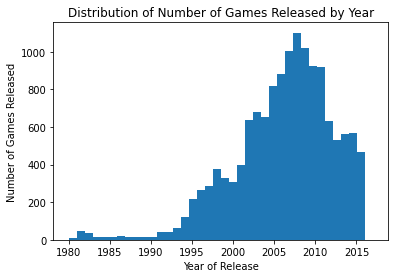

In [18]:
plt.hist(df['year_of_release'].dropna().astype(int), bins=38, range=(1980, 2017))
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Distribution of Number of Games Released by Year')
plt.show()

<div class="alert alert-info" role="alert">

There is an increase in games released in the mid to late 1990s. However, the most significant increase is from the mid to late 2010s. 
    </div>

In [19]:
#Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and 
#build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. 
#How long does it generally take for new platforms to appear and old ones to fade?

sales_by_platform = df.groupby('platform')['total_sales'].sum()
top_platforms = sales_by_platform.nlargest(10).index.tolist()
df_top_platforms = df[df['platform'].isin(top_platforms)]

top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS', 'PS4', 'PSP', 'GBA', 'GB']

In [20]:
ps = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
ps

platform
PS2     1171.19
X360     948.74
PS3      921.09
Wii      791.91
PS       714.26
DS       655.36
PS4      314.00
PSP      273.11
GBA      263.70
GB       254.43
3DS      253.24
PC       252.25
NES      251.05
XB       236.38
N64      218.01
SNES     200.04
GC       185.68
XOne     158.77
2600      86.48
WiiU      81.79
PSV       53.50
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

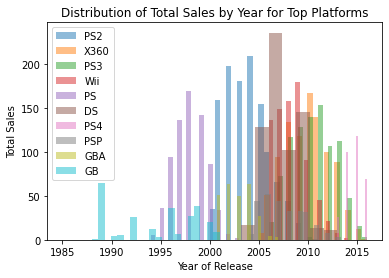

In [21]:
for platform in top_platforms:
    platform_data = df_top_platforms[df_top_platforms['platform'] == platform]
    plt.hist(platform_data['year_of_release'], bins=20, weights=platform_data['total_sales'], alpha=0.5, label=platform)


plt.title('Distribution of Total Sales by Year for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good graph.
</div>

In [22]:
# Determine what period you should take data for. To do so, look at your answers to the previous questions. 
# The data should allow you to build a prognosis for 2017.
# Work only with the data that you've decided is relevant. Disregard the data for previous years.
# Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

last_3_years = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]
platform_sales = last_3_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_yearly_sales = last_3_years.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()
platform_growth = platform_yearly_sales[2016] - platform_yearly_sales[2014]

platform_growth

platform
3DS    -27.97
PC      -8.03
PS3    -44.24
PS4    -30.85
PSP       NaN
PSV     -7.66
Wii       NaN
WiiU   -17.71
X360   -32.55
XOne   -28.25
dtype: float64

<div class="alert alert-info" role="alert">

Students Comment:
    
The data change significantly as expected when I looked at the past three years of sales. 
    </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done.
</div>

In [24]:
platform_active_years = df.groupby('platform')['year_of_release'].nunique().sort_values(ascending=False)
platform_active_years.head(10)

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
DS      11
PS3     11
2600    10
Wii     10
Name: year_of_release, dtype: int64

In [25]:
platform_active_years = round(platform_active_years.mean(), 2)
platform_active_years

7.65

In [26]:
top_10_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS', 'PS4', 'PSP', 'GBA', 'GB']
platform_active_years = df[df['platform'].isin(top_10_platforms)]
platform_active_years = platform_active_years.groupby('platform')['year_of_release'].nunique().sort_values(ascending=False)
platform_active_years.describe()

count    10.000000
mean     10.300000
std       2.626785
min       4.000000
25%      10.000000
50%      11.000000
75%      12.000000
max      13.000000
Name: year_of_release, dtype: float64

In [27]:
platform_growth = platform_yearly_sales[2016] - platform_yearly_sales[2014]
platform_growth = platform_growth.sort_values(ascending=False)
platform_growth

platform
PSV     -7.66
PC      -8.03
WiiU   -17.71
3DS    -27.97
XOne   -28.25
PS4    -30.85
X360   -32.55
PS3    -44.24
PSP       NaN
Wii       NaN
dtype: float64

In [28]:
platform_growth = platform_growth.nlargest()
platform_growth

platform
PSV     -7.66
PC      -8.03
WiiU   -17.71
3DS    -27.97
XOne   -28.25
dtype: float64

<div class="alert alert-info" role="alert">
Determine what period you should take data for. To do so, look at answers to the previous questions. 
The data should allow you to build a prognosis for 2017.
Work only with the data that you've decided is relevant. Disregard the data for previous years.
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
    
First, I changed the year from 2012 to 2013 in the variable platform_growth because PS4 was released in 2013. With PS4 being the newest platform, and needing a prognosis for 2017, it needed to be included. 

The code above shows the "top" platforms from the years with WiiU having the biggest lost. However, the first platform_growth variable shows PS3 and Xbox 360 to be the platforms with the greatest shrinking, outside of the ones that are no longer on the market. The reason is obviously those companies want to promote the newest version of thos consoles: XOne and PS4.    
    </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good conclusion.
</div>

<div class="alert alert-info" role="alert">
    
Using the last 3 years instead of last 5, the "top" platforms are now PSV and PC. Even with PS4 being relatively new to the market, it shows how quick the turn around is for new gaming consoles. In the previous data we saw PS4 to have over 40 million in sales, while now it shows lost after only removing one previous year.     
    
    
   </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice.
</div>

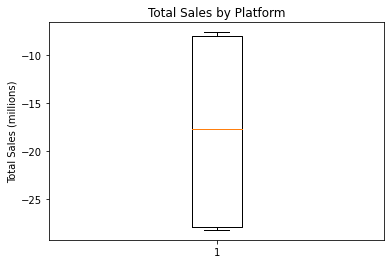

In [29]:
# Build a box plot for the global sales of all games, broken down by platform. 
# Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

plt.boxplot(platform_growth)
plt.title('Total Sales by Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

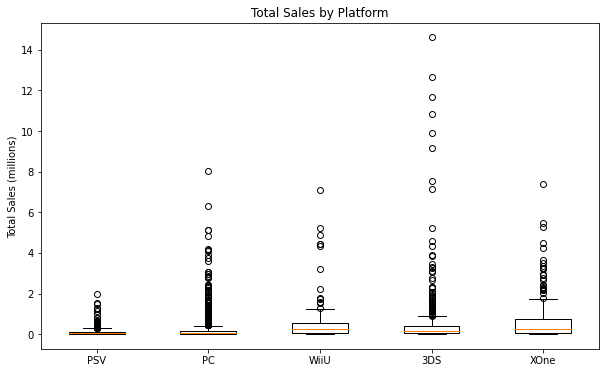

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([df[df['platform'] == p]['total_sales'] for p in platform_growth.index])
ax.set_xticklabels(platform_growth.index)
ax.set_title('Total Sales by Platform')
ax.set_ylabel('Total Sales (millions)')
plt.show()

In [31]:
platform_growth.describe()

count     5.000000
mean    -17.924000
std      10.134534
min     -28.250000
25%     -27.970000
50%     -17.710000
75%      -8.030000
max      -7.660000
dtype: float64

<div class="alert alert-info" role="alert">
    
The differences in sales is significant. Above in the summary statistics, we can see the standard deviation is quite high at 10.134534.
    </div>

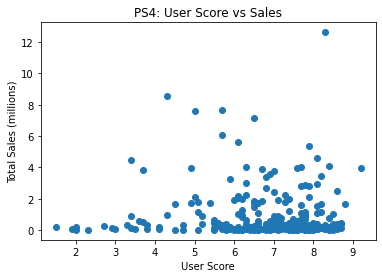

Correlation between user scores and sales: -0.031957110204556424


In [32]:
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
# Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

ps4_data = df[df['platform'] == 'PS4']

plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.title('PS4: User Score vs Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.show()

user_score_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('Correlation between user scores and sales:', user_score_corr)

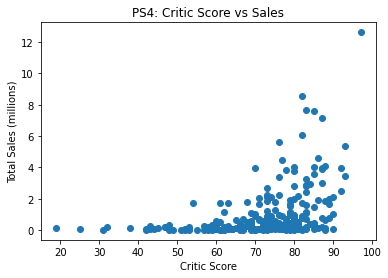

Correlation between critic scores and sales: 0.4064685741971657


In [33]:
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.title('PS4: Critic Score vs Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.show()

user_score_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('Correlation between critic scores and sales:', user_score_corr)

<div class="alert alert-info" role="alert">
User score nor critic score are good indicators of how PS4 performed. Which is a top performer in total sales in the given dataset.
    </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done.
</div>

In [34]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.

game_sales = df.groupby('name')['total_sales'].sum().sort_values(ascending=False)
top_games = game_sales.head(10)

top_games

name
Wii Sports                        82.54
Grand Theft Auto V                56.58
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Modern Warfare 3    30.60
New Super Mario Bros.             29.80
Call of Duty: Black Ops II        29.40
Name: total_sales, dtype: float64

In [35]:
GTA = df[df['name'] == 'Grand Theft Auto V']
GTA

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [36]:
top_5_platforms = ['PS4', 'XOne', 'PSV', 'PC', 'Wiiu']

GTA = df[(df['name'] == 'Grand Theft Auto V') & (df['platform'].isin(top_5_platforms))]
GTA

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


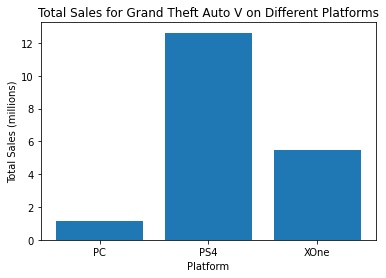

In [37]:
GTA_sales = GTA.groupby('platform')['total_sales'].sum()
plt.bar(GTA_sales.index, GTA_sales.values)
plt.title('Total Sales for Grand Theft Auto V on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

<div class="alert alert-info" role="alert">
Grand Theft Auto V ranked 2nd in total sales. Yet, we can see those sales more than doubled on the PS4 platform vs XOne, and approx 12x more than PC. 
    </div>

In [38]:
#Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 
#Can you generalize about genres with high and low sales?

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [39]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1648.51
Sports          1227.54
Shooter         1033.94
Role-Playing     927.63
Platform         798.01
Misc             692.98
Racing           688.81
Fighting         437.04
Simulation       331.88
Puzzle           208.07
Adventure        203.52
Strategy         169.99
Name: total_sales, dtype: float64

In [40]:
genre_sales_top_5 = genre_sales.nlargest()
genre_sales_top_5

genre
Action          1648.51
Sports          1227.54
Shooter         1033.94
Role-Playing     927.63
Platform         798.01
Name: total_sales, dtype: float64

In [41]:
genre_sales_top_5 = genre_sales.nlargest().index.tolist()
genre_sales_top_5

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

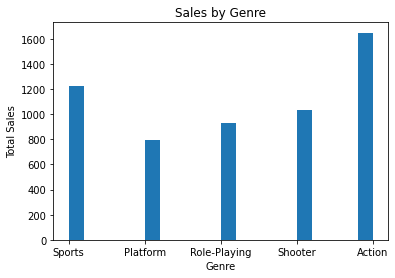

In [42]:
df_top_genres = df[df['genre'].isin(genre_sales_top_5)]

plt.hist(df_top_genres['genre'], bins=20, weights=df_top_genres['total_sales'])
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

In [43]:
genre_sales_bottom_5 = genre_sales.nsmallest()
genre_sales_bottom_5

genre
Strategy      169.99
Adventure     203.52
Puzzle        208.07
Simulation    331.88
Fighting      437.04
Name: total_sales, dtype: float64

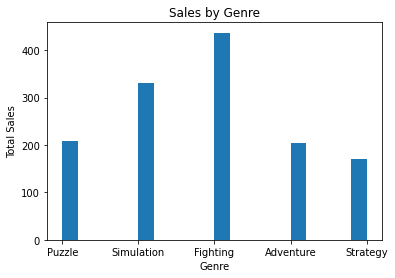

In [44]:
genre_sales_bottom_5 = genre_sales.nsmallest().index.tolist()

df_bottom_genres = df[df['genre'].isin(genre_sales_bottom_5)]

plt.hist(df_bottom_genres['genre'], bins=20, weights=df_bottom_genres['total_sales'])
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

<div class="alert alert-info" role="alert">
    
The most profitable genres are action and sports while strategy and adventure had the lowest sales. It is hard to generalize why these particular genres do good or bad.    
    
   </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

In [45]:
# Step 4. Create a user profile for each region
# For each region (NA, EU, JP), determine:
# The top five platforms. Describe variations in their market shares from region to region.
# The top five genres. Explain the difference.
# Do ESRB ratings affect sales in individual regions?


na_platform = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platform = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platform = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

na_genres = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

na_ratings = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_ratings = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_ratings = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

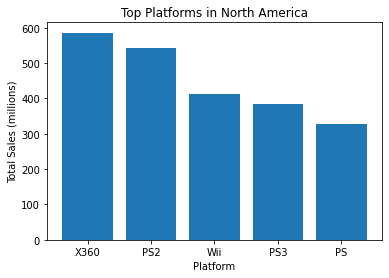

platform
X360    585.84
PS2     543.72
Wii     412.77
PS3     383.80
PS      327.29
Name: na_sales, dtype: float64

In [46]:
# North America Platform Sales

plt.bar(na_platform.index, na_platform.values)
plt.title('Top Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

display(na_platform)

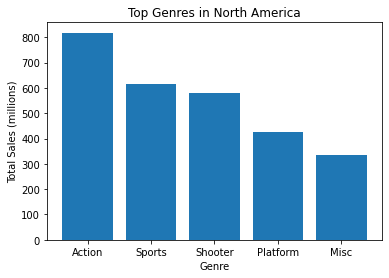

genre
Action      818.22
Sports      616.00
Shooter     579.41
Platform    426.10
Misc        333.65
Name: na_sales, dtype: float64

In [47]:
# North America Genre Sales

plt.bar(na_genres.index, na_genres.values)
plt.title('Top Genres in North America')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.show()

display(na_genres)

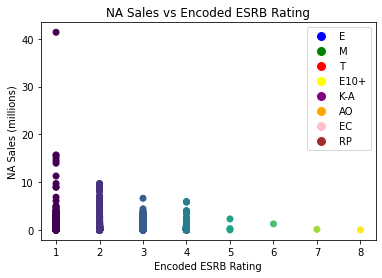

Correlation between NA sales and ESRB rating: -0.07704486371940042


In [48]:
# Map the ESRB rating to an encoded value
df['rating_encoded'] = df['rating'].map({'E':1, 'M':2, 'T':3, 'E10+':4, 'K-A':5, 'AO':6, 'EC':7, 'RP':8})

# Calculate the correlation between NA sales and encoded ESRB rating
na_platform_esrb_corr= df['na_sales'].corr(df['rating_encoded'])

# Create a scatter plot with different colors for each ESRB rating
plt.scatter(df['rating_encoded'], df['na_sales'], c=df['rating_encoded'], cmap='viridis')

# Add a legend to the plot
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='E',
                               markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='M',
                               markerfacecolor='green', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='T',
                               markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='E10+',
                               markerfacecolor='yellow', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='K-A',
                               markerfacecolor='purple', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='AO',
                               markerfacecolor='orange', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='EC',
                               markerfacecolor='pink', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='RP',
                               markerfacecolor='brown', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

# Set plot title and labels
plt.title('NA Sales vs Encoded ESRB Rating')
plt.xlabel('Encoded ESRB Rating')
plt.ylabel('NA Sales (millions)')

# Display the plot
plt.show()

# Print the correlation between NA sales and encoded ESRB rating
print('Correlation between NA sales and ESRB rating:', na_platform_esrb_corr)

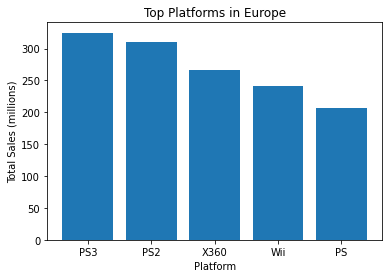

platform
PS3     324.88
PS2     310.88
X360    266.74
Wii     241.29
PS      207.38
Name: eu_sales, dtype: float64

In [49]:
# Europe Platform Sales

plt.bar(eu_platform.index, eu_platform.values)
plt.title('Top Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

display(eu_platform)

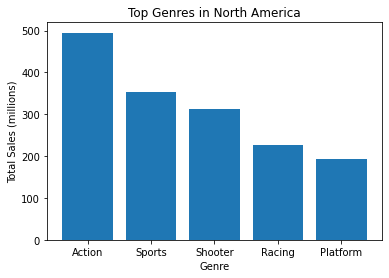

genre
Action      818.22
Sports      616.00
Shooter     579.41
Platform    426.10
Misc        333.65
Name: na_sales, dtype: float64

In [50]:
# Europe Genre Sales

plt.bar(eu_genres.index, eu_genres.values)
plt.title('Top Genres in North America')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.show()

display(na_genres)

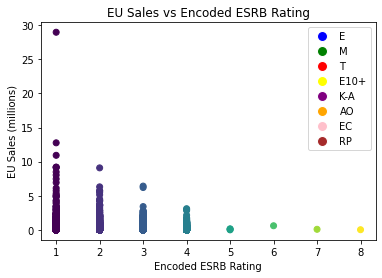

Correlation between NA sales and ESRB rating: -0.07385435269119789


In [51]:
eu_platform_esrb_corr= df['eu_sales'].corr(df['rating_encoded'])

plt.scatter(df['rating_encoded'], df['eu_sales'], c=df['rating_encoded'], cmap='viridis')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='E',
                               markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='M',
                               markerfacecolor='green', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='T',
                               markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='E10+',
                               markerfacecolor='yellow', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='K-A',
                               markerfacecolor='purple', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='AO',
                               markerfacecolor='orange', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='EC',
                               markerfacecolor='pink', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='RP',
                               markerfacecolor='brown', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('EU Sales vs Encoded ESRB Rating')
plt.xlabel('Encoded ESRB Rating')
plt.ylabel('EU Sales (millions)')
plt.show()


print('Correlation between NA sales and ESRB rating:', eu_platform_esrb_corr)

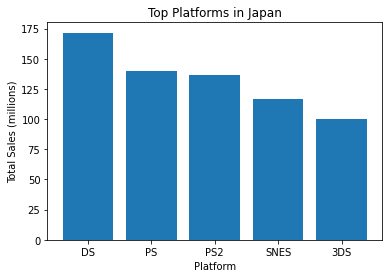

platform
DS      171.54
PS      139.78
PS2     136.75
SNES    116.55
3DS     100.39
Name: jp_sales, dtype: float64

In [52]:
# Japan Platform Sales

plt.bar(jp_platform.index, jp_platform.values)
plt.title('Top Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

display(jp_platform)

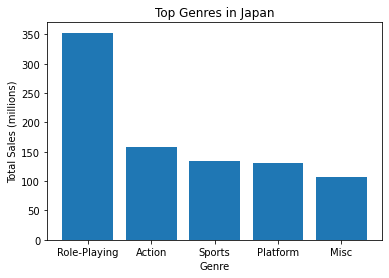

genre
Role-Playing    353.03
Action          158.85
Sports          134.06
Platform        130.49
Misc            106.31
Name: jp_sales, dtype: float64

In [53]:
# Japan Genre Sales

plt.bar(jp_genres.index, jp_genres.values)
plt.title('Top Genres in Japan')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.show()

display(jp_genres)

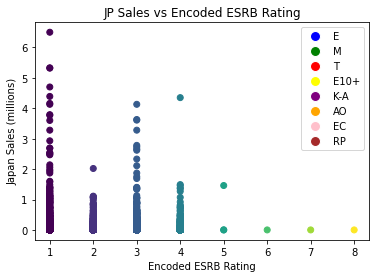

Correlation between NA sales and ESRB rating: -0.044559574745634004


In [54]:
jp_platform_esrb_corr= df['jp_sales'].corr(df['rating_encoded'])

plt.scatter(df['rating_encoded'], df['jp_sales'], c=df['rating_encoded'], cmap='viridis')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='E',
                               markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='M',
                               markerfacecolor='green', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='T',
                               markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='E10+',
                               markerfacecolor='yellow', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='K-A',
                               markerfacecolor='purple', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='AO',
                               markerfacecolor='orange', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='EC',
                               markerfacecolor='pink', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='RP',
                               markerfacecolor='brown', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('JP Sales vs Encoded ESRB Rating')
plt.xlabel('Encoded ESRB Rating')
plt.ylabel('Japan Sales (millions)')
plt.show()


print('Correlation between NA sales and ESRB rating:', jp_platform_esrb_corr)

<div class="alert alert-info" role="alert">
    
Genre and platforms are relatively similiar in Europe and North America, with Xbox being more popular in North America and Playstation being more popular in Europe. Japan has the biggest difference in both genre and platform, with DS being the most popular platform and role-playing being the most popular genre. 
    
ESRB ratings do not have a significant effect on sales in individual regions. 
    </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [55]:
# Step 5. Test the following hypotheses:
#—Average user ratings of the Xbox One and PC platforms are the same.
#—Average user ratings for the Action and Sports genres are different.
#Set the alpha threshold value yourself.
#Explain:
#—How you formulated the null and alternative hypotheses
#—What significance level you chose to test the hypotheses, and why

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_encoded
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,1.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,1.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,1.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38,NaN


In [56]:
# Step 5. Test the following hypotheses:
#—Average user ratings of the Xbox One and PC platforms are the same.

xone_data = df[df['platform'] == 'XOne']['user_score']
pc_data = df[df['platform'] == 'PC']['user_score']

alpha = 0.05
results = stats.ttest_ind(xone_data, pc_data)
p_value = results.pvalue

print(p_value)

if p_value > alpha:
    print("We fail to reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.")
else:
    print("We reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.")

nan
We reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.


In [57]:
print(xone_data.isnull().sum())
print(pc_data.isnull().sum())

54
153


In [58]:
xone_data = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_data = df[df['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(xone_data, pc_data)
p_value = results.pvalue

print(p_value)

if p_value > alpha:
    print("We fail to reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.")
else:
    print("We reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.")

1.3037979620149106e-05
We reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.


In [59]:
# Step 5. Test the following hypotheses:
#—Average user ratings for the Action and Sports genres are different.

action = df[df['genre'] == 'Action']['user_score'].dropna()
sports = df[df['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(action, sports, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the hypothesis")
else:
    print("We can't reject the hypothesis")

p-value: 0.07370217419278534
We can't reject the hypothesis


<div class="alert alert-info" role="alert">
For the first hypothesis, the null hypothesis is that the average user ratings of the Xbox One and PC platforms are the same, while the alternative hypothesis is that they are different.

For the second hypothesis, the null hypothesis is that the average user ratings for the Action and Sports genres are the same, while the alternative hypothesis is that they are different.

A significance level of alpha = 0.05 was chosen to test the hypotheses. This means that if the p-value obtained from the test is less than or equal to 0.05, we reject the null hypothesis and conclude that there is evidence to support the alternative hypothesis. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is not enough evidence to support the alternative hypothesis. This significance level was chosen because it is commonly used in statistical analysis and provides a balance between making false positive and false negative errors.
    </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent.
</div>

<div class="alert alert-info" role="alert">
GENERAL CONCLUSION:

Based on the analysis conducted in this project, several insights can be drawn:

1. The most popular gaming platforms in North America are Xbox, PlayStation, and Nintendo, while in Europe and Japan, PlayStation and Nintendo dominate the market.

2. The most popular gaming genres in terms of total sales are Action, Sports, Shooter, Role-Playing, and Platform. However, the popularity of these genres varies by region. For example, in Japan, Role-Playing games are the most popular, while in North America and Europe, Action and Sports games are the most popular.

3. ESRB ratings have the biggest impact on game sales in North America, with games rated "Mature" and "Teen" selling more than games rated "Everyone" or "Everyone 10+". However, there is still a negative correlation between ESRB ratings and total sales. 

4. The average user ratings of Xbox One and PC platforms are significantly different.

5. The average user ratings for the Action and Sports genres are not significantly different.

These insights can be used by Ice to inform their advertising and marketing strategies for 2017, such as focusing on the most popular platforms and genres in each region and emphasizing those platforms and genres in their marketing. 
    </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great final conclusion!
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Now your project is a true "A". Congratulations!

Your project has been accepted and you can go to the next sprint!
</div>